[Hablar sobre los paquetes empleados]

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from specutils import Spectrum1D
from specutils.fitting import fit_generic_continuum
from astropy.modeling import models
from astropy import units as u
from scipy.interpolate import CubicSpline, interp1d

[¿Para qué sirve lo siguiente?]

In [ ]:
#para que salgan las coordenadas flotantes
def on_hover(event):
    if event.inaxes:  # Verifica que el evento esté dentro de un eje
        x, y = event.xdata, event.ydata
        ax.set_title(f'Coordenadas: x={x:.2f}, y={y:.2f}')

fig, ax = plt.subplots()

# Establece el evento de "hover" sobre el gráfico
fig.canvas.mpl_connect('motion_notify_event', on_hover)

Se introducen los datos de la estrella problema 2 en las variables x->wavelengths e y->Flujo. Como los datos de las estrellas de referencia se encuentran en un rango de longitudes de onda de entre 3900 y 5000 A, se seleccionan únicamente los datos del espectro de la estrella problema correspondientes a este mismo rango. Y se grafica.

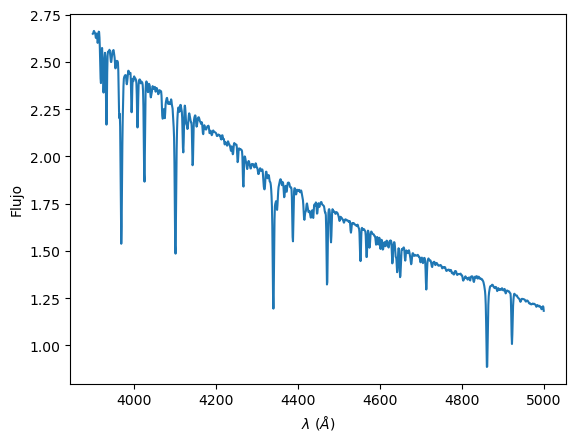

In [8]:
# delimeter indica cual es el delimitado entre una columna y otra
# dtype es el tipo de datos que coge
data=np.genfromtxt('C:/Users/Pablo/OneDrive - Universidad de La Laguna/Master/Cuatri1/AtmosferasEstelares/Entregables/Entregable1/starprob2.dat',
                    dtype=float)
x=data[:,0]
y=data[:,1]

#el for y el if sirve para poner esto pero en el visual studio no coge las &.
#cogemos solo este intervalo para normalizar porque las estrellas de referencia van de 3900 a 5000.
# x=x[(x>3900)&(x<5000)]
# y=y[(x>3900)&(x<5000)]
selected_rows=[]
min_value=3900
max_value=5000
for row in data:
    if min_value <= row [0] <= max_value:
        selected_rows.append(row)
selected_rows=np.array(selected_rows)
# Datos del espectro entre 3900 y 5000 A
x = selected_rows[:,0]
y = selected_rows[:,1]
# #plotear el espectro sin normalizar
plt.plot(x,y) #scatter es puntitos y plot son lineas
plt.xlabel('$\lambda$ ($\t{\AA}$)')
plt.ylabel('Flujo')
plt.title('')
plt.show()

Por otro lado, se escoge un rango de longitudes de onda más amplio pero eliminando los datos en que el flujo es nulo en los extremos. Y se grafica.

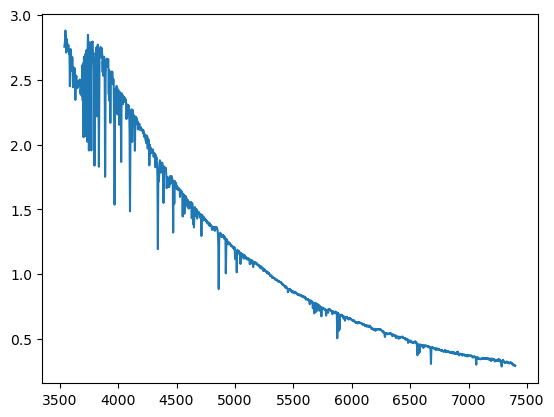

In [10]:
# Datos del espectro completo
x_full=data[:,0]
y_full=data[:,1]
rows_full=[]
# Valores mínimos y máximos para eliminar los datos con flujos nulos
min_value_full=3540
max_value_full=7400
for row in data:
    if min_value_full <= row [0] <= max_value_full:
        rows_full.append(row)
rows_full=np.array(rows_full)
# Datos del espectro completo excepto los datos con flujo nulo
x_full=rows_full[:,0]
y_full=rows_full[:,1]
# Graficando
plt.plot(x_full,y_full)

Se escogen los puntos a mano para crear la envolvente que se empleará para normalizar el espectro.

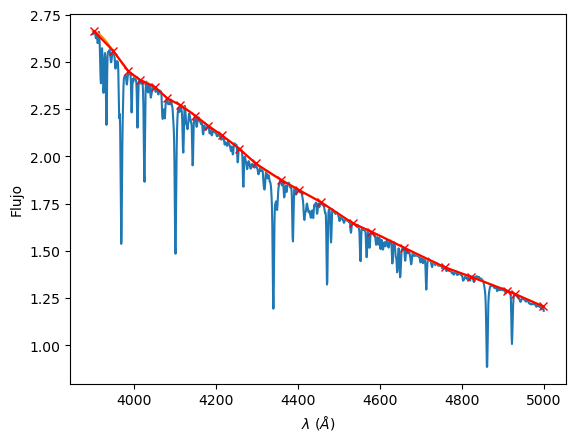

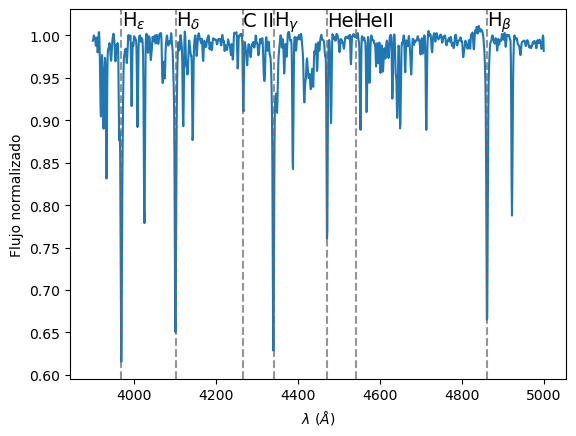

In [14]:
# Ajuste del continuo escogiendo puntos a mano para calcular la envolvente para normalizar el espectro
cont_onda= (3742.1,3781.7,3825.8,3859.1,3903.2,3950,3986.9,4014.8,4051.7,4081.4,4113.8,4149.8,4182.2,4215.5,4256.9,4297.4,4358.6,
            4402.7,4456.7,4535,4579.1,4658.3,4759.1,4822.1,4909.4,4928.3,4997.6,5021,5147.9,5184.8,5224.4,5286.5,5435.9,5516,5603.3,5656.4,
            5714.9,5804.9,5880.5,5948.9,5985.8,6076.7,6146.9,6249.5,6328.7)
# Para asegurarnos de que los valores se encuentran en el intervalo en cuestión
cont_onda = [wave for wave in cont_onda if min(x) <= wave <= max(x)]
# Ajuste del continuum con una spline cúbica utilizando las longitudes de onda reales
cs = CubicSpline(x, y)
# Evaluar la spline en los puntos de longitud de onda escogidos a mano ¿para hallar los valores de flujo reales para cada valor de long de onda?
cont_flux = cs(cont_onda)
# Interpolación cúbica 1D para obtener la envolvente
interp_func = interp1d(cont_onda, cont_flux, kind='cubic', fill_value='extrapolate')
cont_flux_interp = interp_func(x)
# ¿Vale para algo?
spectrum = Spectrum1D(spectral_axis=x*u.AA, flux=y*u.Jy)
# Normalización dividiendo los datos reales entre la envolvente
normalized_spectrum=y/cont_flux_interp
# Creación de las líneas de absorción que se introducirán en la gráfica
lines_spectral = np.array([3970, 4102, 4341, 4861, 4471, 4541, 4267])
lines_spectral_names = [r'H$_{\epsilon}$', r'H$_{\delta}$', r'H$_{\gamma}$', r'H$_{\beta}$', 'HeI', 'HeII','C II']

# Representación gráfica
# Rango de los espectros de referencia sin normalizar
plt.plot(x, y)
# 
plt.plot(x, cont_flux_interp, color = 'darkorange')
# 
plt.plot(cont_onda,cont_flux,marker='x',color='red')
plt.xlabel('$\lambda$ ($\t{\AA}$)')
plt.ylabel('Flujo')
plt.title('')
plt.show()

# Espectro en rango de los de referencia y normalizado
plt.plot(x,normalized_spectrum)
# Líneas de absorción
for i in range(0, np.size(lines_spectral)): 
        plt.axvline(lines_spectral[i], 0, 1, ls = '--', color = 'dimgrey', alpha = 0.7)
        plt.text(lines_spectral[i] + 0.5, max(normalized_spectrum), lines_spectral_names[i], fontsize = 14)
plt.xlabel('$\lambda$ ($\t{\AA}$)')
plt.ylabel('Flujo normalizado')
plt.title('')

plt.show()